<a href="https://colab.research.google.com/github/BasraQasba/Machine-Learning/blob/main/A_Hybrid_Based_Ensemble_Learning_Model_and_Deep_Neural_Network_for_Automated_Diagnosis_of_Brain_Tumor_from_MRI_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
os.listdir('/content/drive/MyDrive/COVID-19')

['no_tumor', 'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor']

In [ ]:
class0=('/content/drive/MyDrive/archive1/Testing/glioma_tumor')
class1=('/content/drive/MyDrive/archive1/Testing/meningioma_tumor')
class2=('/content/drive/MyDrive/archive1/Testing/pituitary_tumor')
class3=('/content/drive/MyDrive/archive1/Testing/no_tumor')

Preprocessing:

In [ ]:
import cv2
from tqdm import tqdm
features = []

for img in tqdm(os.listdir(class0)):
    f = cv2.imread(os.path.join(class0,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)

for img in tqdm(os.listdir(class1)):
    f = cv2.imread(os.path.join(class1,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)

for img in tqdm(os.listdir(class2)):
    f = cv2.imread(os.path.join(class2,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)

for img in tqdm(os.listdir(class3)):
    f = cv2.imread(os.path.join(class3,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)

100%|██████████| 396/396 [02:05<00:00,  3.15it/s]


Define Label Matrix

In [ ]:
labels = []
for img in tqdm(os.listdir(class0)):
    labels.append(0)
for img in tqdm(os.listdir(class1)):
    labels.append(1)
for img in tqdm(os.listdir(class2)):
    labels.append(2)
for img in tqdm(os.listdir(class3)):
    labels.append(3)

100%|██████████| 396/396 [00:00<00:00, 1235821.71it/s]


Features and Labels Numpy array

In [ ]:
import numpy as np
X= np.array(features)
Y= np.array(labels)

In [ ]:
print(X.shape[1:])
print(Y.shape)

(70, 70, 3)
(3160,)


In [ ]:
import keras
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers

CNN model

First Convolution layer

In [ ]:

weight_decay = 1e-4
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=X.shape[1:]))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.4))

Second Convolutional layer

In [ ]:
feature_extractor.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.3))

Third Convolutional Layer

In [ ]:
feature_extractor.add(Conv2D(128,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.4))

Fourth Convolutional layer

In [ ]:
feature_extractor.add(Conv2D(256,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.3))

Fifth Convolutional layer

In [ ]:
feature_extractor.add(Conv2D(512,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.4))

Sixth Convolutional Layer

In [ ]:
feature_extractor.add(Conv2D(1024,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
feature_extractor.add(Activation('relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(pool_size=(2,2)))
feature_extractor.add(Dropout(0.3))

Flatten:

In [ ]:
feature_extractor.add(Flatten())

Fully Connected Layer

In [ ]:
x = feature_extractor.output
x = Dense(32,activation='relu')(x)
prediction_layer = (Dense(4,activation='softmax'))(x)

Making new Model by combining feature extractor and x

In [ ]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 70, 70, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496 

Adding optimiser 

In [ ]:
from keras import optimizers
from keras import metrics

sgd = optimizers.SGD(0.1)

cnn_model.compile(optimizer=sgd,
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

#Divide the data into training and testing sets
#normalise the input data value
#One - hot encoding of labels
#fit the features and labels into model to train

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(xtrain,ytrain,train_size=0.75)

Normalise

In [ ]:
x_train_n = x_train/x_train.max()
xval_n = x_val/x_val.max()
xtest_n=xtest/xtest.max()

One hot encoding for y labels foe neural networks

In [ ]:
y_train_h = np_utils.to_categorical(y_train)
yval_h = np_utils.to_categorical(y_val)
ytest_h = np_utils.to_categorical(ytest)

Running the model over our data:

In [ ]:
cnn_model.fit(x_train_n,y_train_h,
         epochs=60,
         validation_data=(xval_n,yval_h))

Epoch 1/60
60/60 [==============================] - 1s 22ms/step - loss: 0.1856 - accuracy: 0.9699 - val_loss: 0.3634 - val_accuracy: 0.8845
Epoch 2/60
60/60 [==============================] - 1s 20ms/step - loss: 0.1909 - accuracy: 0.9662 - val_loss: 0.3922 - val_accuracy: 0.8750
Epoch 3/60
60/60 [==============================] - 1s 20ms/step - loss: 0.1905 - accuracy: 0.9641 - val_loss: 0.3922 - val_accuracy: 0.8892
Epoch 4/60
60/60 [==============================] - 1s 19ms/step - loss: 0.1861 - accuracy: 0.9710 - val_loss: 0.5540 - val_accuracy: 0.8291
Epoch 5/60
60/60 [==============================] - 1s 19ms/step - loss: 0.1949 - accuracy: 0.9620 - val_loss: 0.7890 - val_accuracy: 0.7389
Epoch 6/60
60/60 [==============================] - 1s 19ms/step - loss: 0.1857 - accuracy: 0.9662 - val_loss: 0.7046 - val_accuracy: 0.7547
Epoch 7/60
60/60 [==============================] - 1s 20ms/step - loss: 0.1784 - accuracy: 0.9731 - val_loss: 0.4521 - val_accuracy: 0.8339
Epoch 8/60
60

Evaluating the train data:

In [ ]:
cnn_model.evaluate(x_train_n,y_train_h)

60/60 [==============================] - 0s 7ms/step - loss: 0.1520 - accuracy: 0.9889


[0.15197056531906128, 0.9889240264892578]

Evaluating Validation Data set

In [ ]:
cnn_model.evaluate(xval_n,yval_h)

20/20 [==============================] - 0s 8ms/step - loss: 0.3806 - accuracy: 0.9003


[0.3806094229221344, 0.9003164768218994]

Evaluating the test data:

In [ ]:
cnn_model.evaluate(xtest_n,ytest_h)

20/20 [==============================] - 0s 9ms/step - loss: 0.3513 - accuracy: 0.9082


[0.3513399064540863, 0.9082278609275818]

Making predictions :

In [ ]:
ytest_pred = []
preds = cnn_model.predict(xtest_n)
for p in preds:
    ytest_pred.append(np.argmax(p))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ytest_pred)

array([[145,  12,  11,  12],
       [  6, 165,   7,   6],
       [  0,   0, 178,   0],
       [  0,   1,   3,  86]])

In [ ]:
x_train_n.shape

(1896, 70, 70, 3)

In [ ]:
xtest_n[90].shape

(70, 70, 3)

In [ ]:
predictions = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

Predictions meningioma_tumor
Actual meningioma_tumor


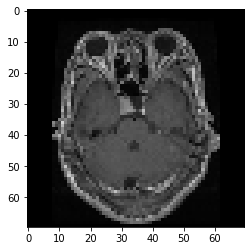

In [ ]:
print('Predictions',predictions[np.argmax(cnn_model.predict(xtest_n[91].reshape(1,70,70,3)))])
print('Actual',predictions[ytest[91]])


import matplotlib.pyplot as plt
plt.imshow(xtest_n[90])
plt.show()

Extracting features from the model for ML algorithm

In [ ]:
X_for_ML = feature_extractor.predict(x_train_n)

In [ ]:
x_train_n.shape

(1896, 70, 70, 3)

In [ ]:
X_for_ML.shape

(1896, 1024)

In [ ]:
xtest_n.shape

(632, 70, 70, 3)

In [ ]:
x_test_n_2=[]
x_test_n_2= xtest_n.reshape(632,70,70,3)

Voting Ensemble for classification:

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_1 = RandomForestClassifier(n_estimators = 50, random_state =42)


model_2 = KNeighborsClassifier()


model_3 = GaussianNB()


model_4 = XGBClassifier()

model_5 = GradientBoostingClassifier()

model_6 = SVC()


model = VotingClassifier(
     estimators=[('rf',model_1 ), ('knn', model_2), ('gnb', model_3),('xgb', model_4),('gb',model_5),('svc',model_6)],
     voting='hard')

model.fit(X_for_ML, y_train)


X_test_feature = feature_extractor.predict(x_test_n_2)
prediction_ML = model.predict(X_test_feature)



for model, label in zip([model_1, model_2, model_3, model_4,model_5,model_6], ['RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'XGBoost',
                                                                               'GradientBoostingClassifier','SVC']):
     
     scores = cross_val_score(model, X_test_feature,ytest, scoring='accuracy', cv=5)
     print(scores.mean(), scores.std(), label)


0.9271716035495563 0.03451614137445109 RandomForestClassifier
0.8939132608423946 0.04285463689997174 KNeighborsClassifier
0.8970753655793026 0.04298481473212822 GaussianNB
0.9224471941007375 0.022139104709816608 XGBoost
0.912935883014623 0.02565824240595042 GradientBoostingClassifier
0.9271591051118611 0.036022713435464926 SVC


Accuracy, Precision, F1 score and Recall of Ensemble

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
accuracy_m = accuracy_score(ytest,prediction_ML)
print(accuracy)
precision_m = precision_score(ytest,prediction_ML,average=None)
print(precision_m)
recall_m = recall_score(ytest,prediction_ML,average=None)
print(recall_m)
f1_m = f1_score(ytest,prediction_ML,average=None)
print( f1_m)
confusion_matrix(ytest,prediction_ML)

0.9256329113924051
[0.93413174 0.86567164 0.98285714 0.93258427]
[0.86666667 0.94565217 0.96629213 0.92222222]
[0.89913545 0.9038961  0.97450425 0.9273743 ]


array([[156,  21,   0,   3],
       [  4, 174,   3,   3],
       [  1,   5, 172,   0],
       [  6,   1,   0,  83]])

In [ ]:
print(precision_m.mean())
print(recall_m.mean())
print(recall_m.mean())
print(f1_m.mean())

0.9288111977095138
0.9252082994083484
0.9252082994083484
0.9262275253874364


Accuracy, Precision, recall, F1 score of CNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(ytest,ytest_pred)
print(accuracy)
# precision tp / (tp + fp)
precision_c = precision_score(ytest,ytest_pred,average=None)
print(precision_c)
# recall: tp / (tp + fn)
recall_c = recall_score(ytest,ytest_pred,average=None)
print(recall_c)
# f1: 2 tp / (2 tp + fp + fn)
f1_c = f1_score(ytest,ytest_pred,average=None)
print( f1_c)
confusion_matrix(ytest,ytest_pred)

0.9082278481012658
[0.9602649  0.92696629 0.89447236 0.82692308]
[0.80555556 0.89673913 1.         0.95555556]
[0.87613293 0.91160221 0.94429708 0.88659794]


array([[145,  12,  11,  12],
       [  6, 165,   7,   6],
       [  0,   0, 178,   0],
       [  0,   1,   3,  86]])

In [ ]:
print(precision_c.mean())
print(recall_c.mean())
print(recall_c.mean())
print(f1_c.mean())

0.9021566578823013
0.9144625603864734
0.9144625603864734
0.9046575402076983
